In [9]:
import pandas as pd

In [10]:
ob_prl = pd.read_csv("round1/ob_prl_train.csv", delimiter=";",
                     index_col="timestamp")
trd_prl = pd.read_csv("round1/trd_prl_train.csv", delimiter=";",
                      index_col=None)


In [11]:
import seaborn as sns

<Axes: xlabel='timestamp', ylabel='price'>

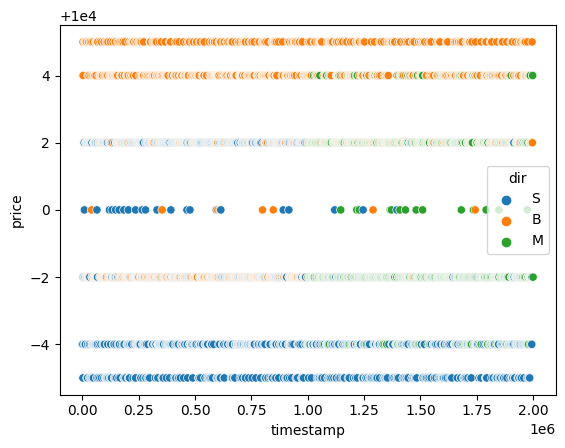

In [13]:
sns.scatterplot(x='timestamp', y='price', hue='dir', data=trd_prl)

In [14]:
max(ob_prl['ask_price_1'] - ob_prl['bid_price_1'])

10

<Axes: xlabel='bid_price_1', ylabel='ask_price_1'>

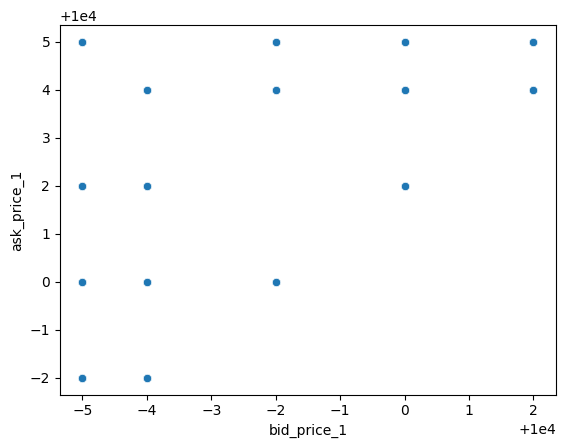

In [18]:
sns.scatterplot(x='bid_price_1', y='ask_price_1', data=ob_prl)

In [19]:
ob_prl['spread_state'] = ob_prl['ask_price_1'].astype(str) + ob_prl['bid_price_1'].astype(str)
ob_prl.head()

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread_state
timestamp,,,,,,,,,,,,,,,,
0,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0,100049996
100,PEARLS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,-8.0,1000510000
200,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,-8.0,100049996
300,PEARLS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,-8.0,100049996
400,PEARLS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,-8.0,99989995


In [22]:
ob_prl['spread_state'] = pd.factorize(ob_prl['spread_state'])[0]
ob_prl.head()

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread_state
timestamp,,,,,,,,,,,,,,,,
0,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0,0
100,PEARLS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,-8.0,1
200,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,-8.0,0
300,PEARLS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,-8.0,0
400,PEARLS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,-8.0,2


In [54]:
import numpy as np
from hmmlearn import hmm

# Define the HMM model
n_states = 16
model = hmm.CategoricalHMM(n_components=n_states)

# Define the observed sequence
obs = ob_prl['spread_state'].to_numpy().reshape(-1, 1)

# Fit the model to the observed sequence
model.fit(obs)

# Get the most likely hidden state sequence for the observed sequence
hidden_states = model.decode(obs)
print(hidden_states)

(-49987.56054418012, array([ 6, 14,  0, ...,  9, 11,  6]))


In [59]:
transmat = model.transmat_ 
ex_mid = np.sum(transmat * np.asarray([0, 2.5, -3.5, 0, 1, 3, -1.5, 1.5, -1, 2, -3, 3.5, 1, -2, -1, -2.5]), axis=1)
ex_spread = np.sum(transmat * np.asarray([8, 5, 3, 10, 6, 2, 7, 7, 6, 4, 2, 3, 2, 4, 2, 5]), axis=1)

In [60]:
print(ex_mid)
print(ex_spread)

[-2.50019918 -1.48412331  0.82434294  0.17911975 -1.24370293  1.3478384
  0.34437609 -1.30115393  0.05740215  3.17071492  0.89782136 -1.12222236
  0.9458624  -1.08852431  0.01207756 -1.64148171]
[4.98817915 4.72785781 4.37135827 4.88507879 4.16692804 4.53007865
 6.09024322 6.07501327 5.82588375 3.06204149 3.47084313 6.7189051
 3.51162703 5.00038831 7.8904695  6.28695562]


In [61]:
ob_prl['pred_mid'] = ex_mid[ob_prl['spread_state']]
ob_prl['pred_spread'] = ex_spread[ob_prl['spread_state']]
ob_prl['pred_mid'] = ob_prl['pred_mid'].shift(-1)
ob_prl['pred_spread'] = ob_prl['pred_spread'].shift(-1)

In [62]:
ob_prl

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,...,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread_state,spread,mid_state,spread_mag_state,pred_mid,pred_spread
timestamp,,,,,,,,,,,,,,,,,,,,,
0,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,...,NaN,NaN,10000.0,0.0,0,8,0,0,-1.484123,4.727858
100,PEARLS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,...,NaN,NaN,10002.5,-8.0,1,5,1,1,-2.500199,4.988179
200,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,...,NaN,NaN,10000.0,-8.0,0,8,0,0,-2.500199,4.988179
300,PEARLS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,...,NaN,NaN,10000.0,-8.0,0,8,0,0,0.824343,4.371358
400,PEARLS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,...,10005.0,20.0,9996.5,-8.0,2,3,2,2,0.179120,4.885079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999400,PEARLS,10000,5,9996.0,2.0,9995.0,29.0,10004,2,10005.0,...,NaN,NaN,10002.0,-760.0,9,4,8,7,3.170715,3.062041
1999500,PEARLS,10000,4,9996.0,2.0,9995.0,28.0,10004,2,10005.0,...,NaN,NaN,10002.0,-760.0,9,4,8,7,0.179120,4.885079
1999600,PEARLS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,...,NaN,NaN,10000.0,-760.0,3,10,0,3,0.344376,6.090243


<Axes: xlabel='spread', ylabel='pred_spread'>

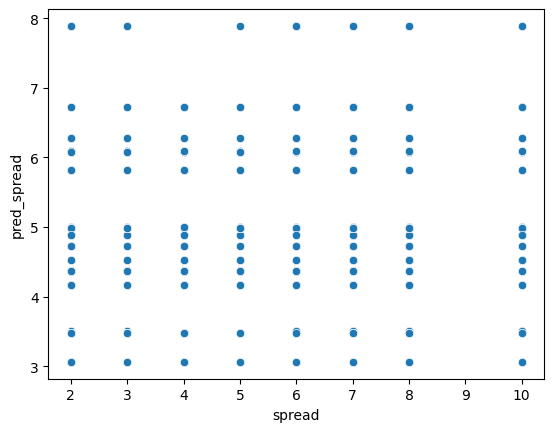

In [63]:
sns.scatterplot(x='spread', y='pred_spread', data=ob_prl)